/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.3439 - loss: 1.7738 - val_accuracy: 0.5486 - val_loss: 1.2602
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5688 - loss: 1.2242 - val_accuracy: 0.5914 - val_loss: 1.1729
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6329 - loss: 1.0433 - val_accuracy: 0.6486 - val_loss: 1.0118
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6744 - loss: 0.9316 - val_accuracy: 0.6502 - val_loss: 1.0070
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6972 - loss: 0.8490 - val_accuracy: 0.6820 - val_loss: 0.9170
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7240 - loss: 0.7862 - val_accuracy: 0.6950 - val_loss: 0.9090
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.7375 - loss: 0.7424 - val_accuracy: 0.6884 - val_loss: 0.9253
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7578 -

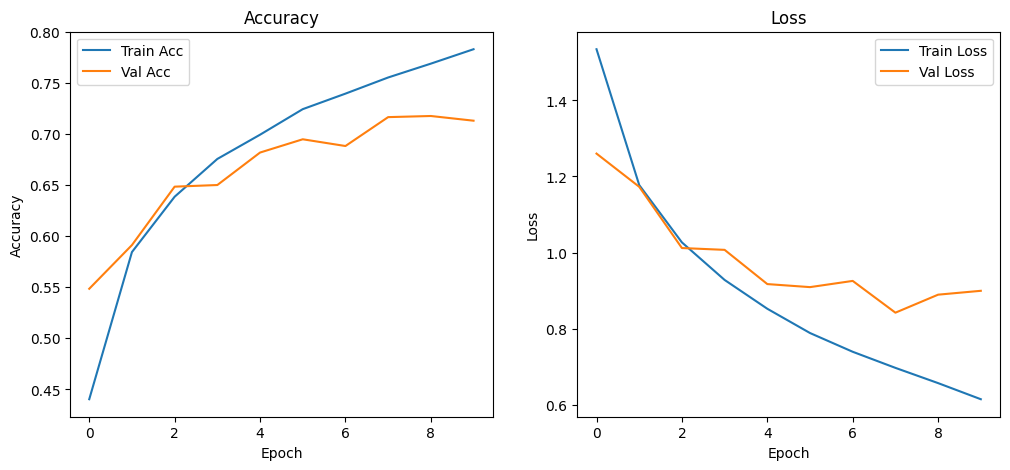

In [3]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix


# 1. Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalisasi
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Bangun Model CNN (lebih kompleks untuk CIFAR-10)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# 4. Evaluasi Model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred_classes))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_classes))

# 5. Grafik
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9101 - loss: 0.3025 - val_accuracy: 0.9835 - val_loss: 0.0499
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.9888 - val_loss: 0.0339
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9892 - val_loss: 0.0321
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9900 - val_loss: 0.0311
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9962 - loss: 0.0137 - val_accuracy: 0.9913 - val_loss: 0.0279
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9116 - loss: 0.2913 - val_accuracy: 0.9838 - val_loss: 0.0463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9862 - loss: 0.0465 - val_accuracy: 0.9900 - val_loss: 0.0286
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9918 - loss: 0

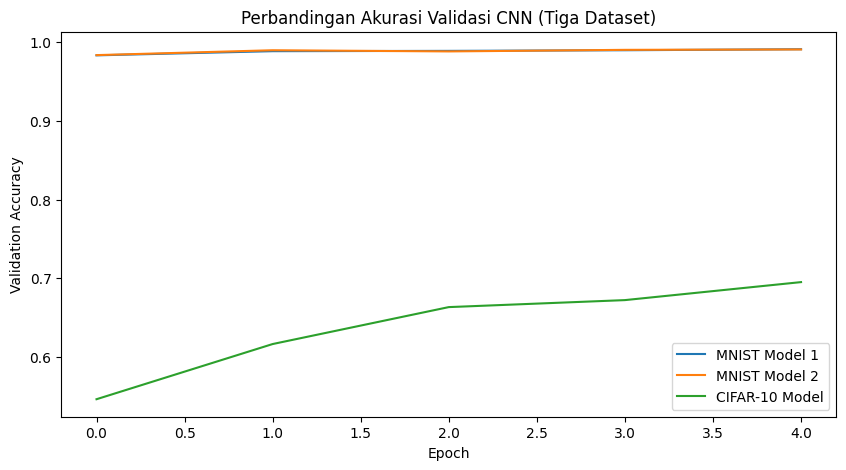

In [4]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf

# ------------------------------
# 1. MODEL CNN UNTUK MNIST (Model 1)
# ------------------------------
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., None]
X_test = X_test[..., None]

model_mnist_1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_mnist_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_hist_1 = model_mnist_1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


# ------------------------------
# 2. MODEL CNN UNTUK MNIST (Model 2 – sama, tapi dilatih ulang)
# ------------------------------
model_mnist_2 = models.clone_model(model_mnist_1)
model_mnist_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_hist_2 = model_mnist_2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


# ------------------------------
# 3. MODEL CNN UNTUK CIFAR-10
# ------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

model_cifar = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cifar_hist = model_cifar.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))



# ================================
# GRAFIK PERBANDINGAN 3 MODEL CNN
# ================================

plt.figure(figsize=(10,5))
plt.plot(mnist_hist_1.history['val_accuracy'], label="MNIST Model 1")
plt.plot(mnist_hist_2.history['val_accuracy'], label="MNIST Model 2")
plt.plot(cifar_hist.history['val_accuracy'], label="CIFAR-10 Model")

plt.title("Perbandingan Akurasi Validasi CNN (Tiga Dataset)")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()